<h2> Assignment 5 Notebook </h2> 
<body>
<p>Full name : Yuhan Liu</p>
<p>Wisc Id : 9069436013</p>
<p>Test Setup details : </p>
<p>Jupyter verison : 4.3.0</p>
</body>

In [2]:
import pandas as pd
# numpy has a lots of useful math related modules 
import numpy as np
# Helpful function to display intermittent result 
from IPython.display import display


<H4>Step 0 : Take a peek at the dataset</H4>

In [3]:
# Load the data and display only first five rows 
# NOTE replace the following value with the actual path to the csv file 
data_file = "AQI.csv" # e.g ~/cs564/p5/AQI.csv"
display(pd.read_csv(data_file, nrows=5).head())

,State Code,County Code,Latitude,Longitude,Date Local,AQI,Address,State Name,County Name,City Name,CBSA Name
0,55,59,42.504722,-87.8093,1997-04-28,82,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
1,55,59,42.504722,-87.8093,1997-05-10,33,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
2,55,59,42.504722,-87.8093,1997-05-16,25,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
3,55,59,42.504722,-87.8093,1997-05-22,25,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
4,55,59,42.504722,-87.8093,1997-05-28,46,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"


<H5>Step 1 : Load the dataset</H5>


In [4]:
from sqlalchemy import create_engine
import sqlite3
# create a database where we'll load the dataset from the csv file 
db_conn = create_engine('sqlite:///AirQualityIndex.db')

In [5]:
import string
# load in a batch of 5000 tuples. Modify this value to your needs
chunks = 5000
for data in pd.read_csv(data_file, chunksize=chunks,
 iterator=True, encoding='utf-8'):

 data = data.rename(columns={col: col.replace('-', ' ') for col in data.columns})
 data = data.rename(columns={col: col.strip() for col in data.columns})
 data = data.rename(columns={col: string.capwords(col) for col in data.columns})
 data = data.rename(columns={col: col.replace(' ', '') for col in data.columns})

 data.to_sql('data', db_conn, if_exists='append')

<H5>Step 2 : Data Exploration</H5>
<body>
<p> Find the average air quality index for each city recorded during the year 1997 </p>
</body>

In [6]:
avg_city_latitude = pd.read_sql_query("""SELECT AVG(Latitude) as avg_latitude, 
                             CityName as city FROM data
                             WHERE "DateLocal" LIKE "1997-%" 
                             GROUP BY city 
                             ORDER BY avg_latitude DESC""", db_conn)

# Display the result (Note - the result 'avg_air_quality' is an instance of 'pandas DataFrame')
display(avg_city_latitude)

,avg_latitude,city
0,43.020075,Waukesha
1,43.016667,Milwaukee
2,42.504722,Pleasant Prairie


In [7]:
avg_city_longitude = pd.read_sql_query("""SELECT AVG(Longitude) as avg_longitude, 
                             CityName as city FROM data
                             WHERE "DateLocal" LIKE "1997-%" 
                             GROUP BY city 
                             ORDER BY avg_longitude DESC""", db_conn)

# Display the result (Note - the result 'avg_air_quality' is an instance of 'pandas DataFrame')
display(avg_city_longitude)

,avg_longitude,city
0,-87.809300,Pleasant Prairie
1,-87.933333,Milwaukee
2,-88.215070,Waukesha


In [8]:
max_air_quality = pd.read_sql_query("""SELECT MAX(AQI) as max_aqi, 
                             CityName as city, DateLocal as date FROM data
                             WHERE "DateLocal" LIKE "1997-%" 
                             GROUP BY city 
                             ORDER BY max_aqi DESC""", db_conn)

# Display the result (Note - the result 'avg_air_quality' is an instance of 'pandas DataFrame')
display(max_air_quality)

,max_aqi,city,date
0,137,Milwaukee,1997-04-04
1,95,Pleasant Prairie,1997-10-07
2,93,Waukesha,1997-04-28


<H5>Step 3 : Data Visualization</H5>
<body>
<p>Visualize the data you received above as plots</p>
</body>

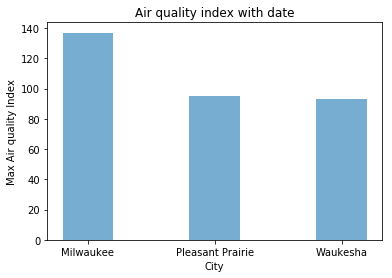

In [9]:
# Use matplotlib library to plot graph - a simple barchart in this case 
# We encourage you to explore different and more complex types of chart
import matplotlib.pyplot as plt


# First we convert the Dataframe object to Python list (that Matplotlib understands)
from pandas import DataFrame
# this is our 'y-axis' value - obtained by flattening the DataFrame object 
aqis_list = list(max_air_quality['max_aqi'].values.flatten())
# This is our x-axis value 
cities = list(max_air_quality['city'].values.flatten())
dates = list(max_air_quality['date'].values.flatten())
# Specify the plot type and formatting 
plt.title('Air quality index with date')
y_pos = np.arange(len(cities))
# Type of graph
plt.bar(y_pos, aqis_list, align='center', alpha=0.6, width=0.4)
# Specify 'ticks' on the x-axis for each item in the list for 'x-axis' values  
plt.xticks(y_pos, cities)
plt.xlabel('City')
plt.ylabel('Max Air quality Index')
plt.show()
# Save this diagram(by default at the directory from where this application is launched)
plt.savefig("max_air_quality.png")


<h5> Step 4 : Optional (recommended) : Build Machine Learning models </h5>

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
df = pd.read_csv('AQI.csv')
df = df.dropna()
lr = linear_model.LinearRegression()
x = df['Latitude']
y = df.AQI

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, x, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.show()

/Users/yuhanliu/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/yuhanliu/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 2622025]

<H4>Summary </H4>
<body>
<p>1. Write a brief summary of your findings here. </p>
<p>2. Additionally explore by building a machine learning model using scikit-learn to make predictions and analysis </p>
</body>

<h5> Finally, take a moment to reflect on what we achieved here - we started with a raw dataset, processed them, built models and ran analytics to finally gain insights from the data :) </h5> 